<a href="https://colab.research.google.com/github/jamieoliver/cats-vs-dogs-240913/blob/main/cats-vs-dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats vs Dogs

Based on https://github.com/fastai/course22/blob/master/02-saving-a-basic-fastai-model.ipynb.

In [1]:
!pip install -Uqq fastai huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 7.9 MB/s eta 0:00:00


## Download Training Data

In [2]:
from fastai.vision.all import *

data_path = untar_data(URLs.PETS)/'images'

## Train Model

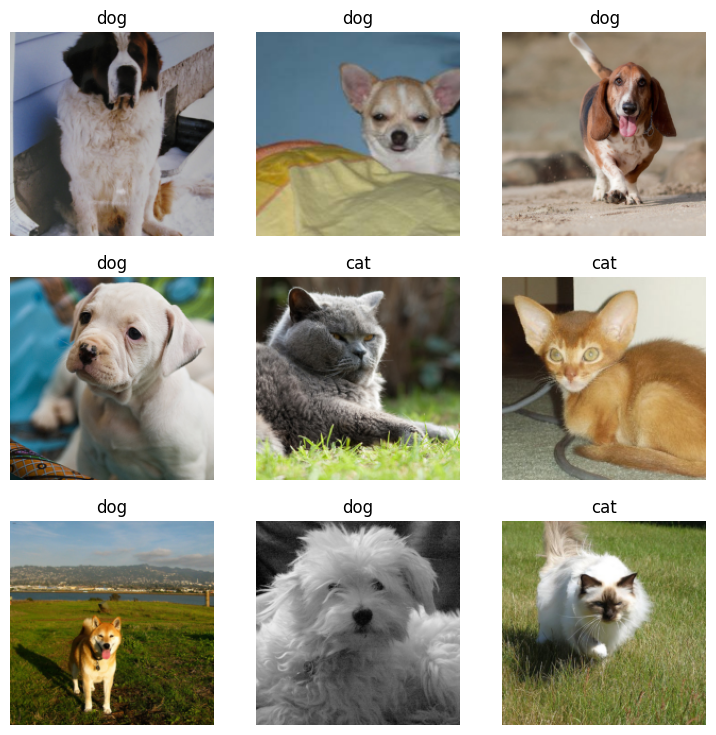

In [3]:
def label(x): return 'cat' if x[0].isupper() else 'dog'

dls = ImageDataLoaders.from_name_func('.',
                                      get_image_files(data_path),
                                      valid_pct=0.2,
                                      seed=42,
                                      label_func=label,
                                      item_tfms=Resize(192))

dls.show_batch()

In [4]:
learner = vision_learner(dls, resnet18, metrics=error_rate)
learner.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 86.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.217045,0.051854,0.014208,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.067392,0.020136,0.008796,00:46
1,0.043503,0.017932,0.006089,00:41
2,0.020313,0.010542,0.004060,00:41


## Test Model

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

dog.jpeg:   0%|          | 0.00/5.84k [00:00<?, ?B/s]

cat.jpeg:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

dog-cat.jpeg:   0%|          | 0.00/4.79k [00:00<?, ?B/s]

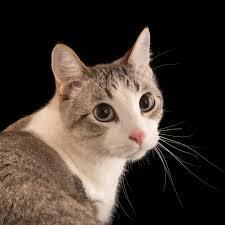

Image is a cat with probability 1.00


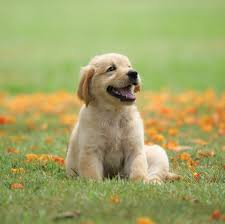

Image is a dog with probability 1.00


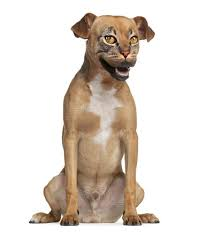

Image is a dog with probability 1.00


In [5]:
from huggingface_hub import *

test_data_path = snapshot_download('jamieoliver/cats-vs-dogs',
                                   repo_type='dataset',
                                   allow_patterns='*.jpeg')

for example in os.listdir(test_data_path):
  image = PILImage.create(os.path.join(test_data_path, example))
  display(image)
  pred,index,probs = learner.predict(image)
  print(f'Image is a {pred} with probability {probs[index]:.2f}')

## Export Model

In [6]:
learner.export('model.pkl')